<a href="https://colab.research.google.com/github/Pedro4010/caseifood/blob/main/clusterizacao_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Ifood

### O objetivo desse trabalho é desenvolver um modelo preditivo que vai produzir maior retorno para a próxima campanha de marketing do Ifood, além de entender as características dos clientes que estão dispostos a comprar o produto.
### Este notebook possui análises de agrupamento.

In [6]:
# Conectando ao drive e lendo o csv através do pandas.
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
customers = pd.read_csv('/content/drive/MyDrive/googlecolab/cleaned_ifood.csv', index_col = 'ID')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### O conjunto de dados contém características sociodemográficas e firmográficas de cerca de 2.240 clientes que foram contatados. Além disso, contém um sinalizador para os clientes que responderam à campanha.


**Feature** -> **Descrição**
*   AcceptedCmp1 -> 1 se o cliente aceitou a oferta na 1st campanha, 0 se não.
*   AcceptedCmp2 -> 1 se o cliente aceitou a oferta na 2st campanha, 0 se não.
*   AcceptedCmp3 -> 1 se o cliente aceitou a oferta na 3st campanha, 0 se não.
*   AcceptedCmp4 -> 1 se o cliente aceitou a oferta na 4st campanha, 0 se não.
*   AcceptedCmp5 -> 1 se o cliente aceitou a oferta na 5st campanha, 0 se não.
*   Response(target) -> 1 se o cliente aceitou a oferta na última campanha, 0 se não.
*   Complain -> 1 se o cliente reclamou nos últimos 2 anos
*   DtCustomer -> dados de cadastro do cliente na empresa
*   Education -> nível de instrução do cliente
*   Marital -> estado civil do cliente
*   Kidhome -> número de crianças pequenas na casa do cliente
*   Teenhome -> número de adolescentes na casa do cliente
*   Income -> renda familiar anual do cliente
*   MntFishProducts -> valor gasto em produtos de peixe nos últimos 2 anos 
*   MntMeatProducts -> valor gasto em produtos de carne nos últimos 2 anos
*   MntFruits -> valor gasto em produtos de frutas nos últimos 2 anos
*   MntSweetProducts -> valor gasto em produtos doces nos últimos 2 anos
*   MntWines -> valor gasto em produtos vitivinícolas nos últimos 2 anos
*   MntGoldProds -> valor gasto em produtos de ouro (especiais) nos últimos 2 anos
*   NumDealsPurchases -> número de compras feitas com desconto
*   NunCatalogPurchases -> número de compras feitas usando o catálogo
*   NunStorePurchases -> número de compras feitas diretamente nas lojas
*   NumWebPurchases -> número de compras feitas através do site da empresa 
*   NumWebVisitsMonth -> número de visitas ao site da empresa no último mês
*   Recency -> número de dias desde a última compra    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Insights

##### As colunas estão em um ponto de tratamento ok. Nesse ponto já conseguimos tirar vários insights.
##### Algumas das perguntas de negócios que podem ser respondidas com um tratamento prévio dos dados:
*   Qual a média de idade dos clientes que mais aderiram a campanha ?
*   Por qual meio esses clientes efetuaram as compras ?
*   Como é o comportamento dos clientes que usam cupons mas não aderem a campanha ?
*   75% das pessoas que não aderiram a campanha nenhuma vez ganham menos de 64000, enquanto a média salarial das pessoas que aderiram 4 vezes a campanha passa dos 80000.





In [ ]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [ ]:
customers_4acc = customers[customers['Total_Accepted']==0]
customers_4acc.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,1777.0,2.348340,0.530265,1.0,2.0,2.0,3.0,3.0
Income,1777.0,48538.152555,20348.268087,1730.0,33438.0,47352.0,63887.0,162397.0
Recency,1777.0,49.340461,28.986882,0.0,24.0,50.0,75.0,99.0
MntWines,1777.0,223.855937,264.796519,0.0,18.0,102.0,368.0,1396.0
MntFruits,1777.0,23.613393,37.673453,0.0,1.0,7.0,28.0,199.0
MntMeatProducts,1777.0,134.739449,197.660774,0.0,13.0,49.0,171.0,1725.0
MntFishProducts,1777.0,32.948790,50.696069,0.0,2.0,10.0,39.0,259.0
MntSweetProducts,1777.0,23.683737,38.337688,0.0,1.0,7.0,27.0,263.0
MntGoldProds,1777.0,38.963984,48.771113,0.0,7.0,20.0,49.0,362.0
NumDealsPurchases,1777.0,2.411367,1.965681,0.0,1.0,2.0,3.0,15.0


In [ ]:
customers_60K = customers[customers['Income']>60000.00]

In [ ]:
customers_deals = customers[customers['NumDealsPurchases']>=5]

In [ ]:
customers_deals

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422
5376,2,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,0,43,539,2,1,3,1730
1409,2,40689.0,69,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,0,0,71,468,2,1,3,444
7373,3,46610.0,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,1,0,70,608,1,2,3,302
4339,3,67353.0,37,702,17,151,0,8,35,5,5,6,12,2,0,0,0,0,0,0,0,0,52,180,2,1,3,913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2,41769.0,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,0,0,67,501,1,1,2,521
4749,2,58554.0,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,0,0,54,641,2,2,4,586
4478,2,63777.0,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,0,0,43,462,2,2,4,653


In [ ]:
customers_age = customers[customers['Age']<=40]
customers_age

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6182,2,26646.0000,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
6177,3,33454.0000,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,0,37,417,2,1,3,169
1994,2,51969.8614,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,0,39,226,2,1,3,19
2569,2,17323.0000,38,3,14,17,6,1,5,1,1,0,3,8,0,0,0,0,0,0,0,0,35,627,2,0,2,46
2278,2,33812.0000,86,4,17,19,30,24,39,2,2,1,3,6,0,0,0,0,0,0,0,0,37,603,1,1,2,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2,28427.0000,67,18,3,19,3,3,6,2,2,0,3,8,0,0,0,0,0,0,0,0,39,465,2,1,3,52
9246,3,40101.0000,73,171,3,129,26,24,62,4,6,1,6,7,0,0,0,0,0,0,0,0,37,623,2,1,3,415
7366,3,75777.0000,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,1,2,40,360,1,0,1,1438


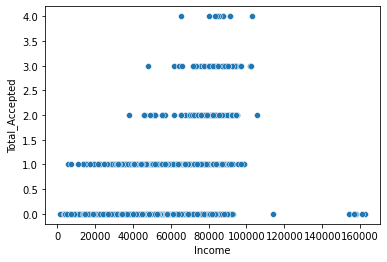

In [ ]:
sns.scatterplot(x="Income", y = "Total_Accepted", data=customers)
plt.show()

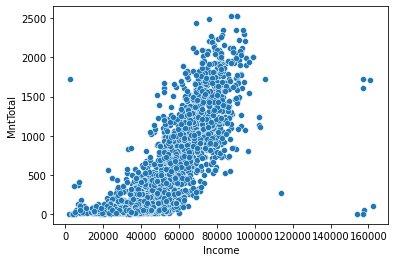

In [ ]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers)
plt.show()

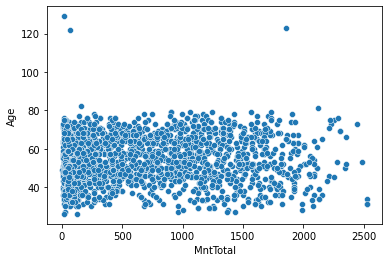

In [ ]:
sns.scatterplot(x="MntTotal", y = "Age", data=customers)
plt.show()

In [ ]:
for col in customers.columns[1:]:
  sns.boxplot(data=customers[col], orient='h')
  plt.title(col)
  plt.show()

In [ ]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [ ]:
customers.describe()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.358036,51969.861400,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.297768,53.194196,353.582143,1.644643,0.950446,2.595089,605.798214
std,0.527432,21405.804535,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.678381,11.984069,202.122512,0.478728,0.751803,0.906959,602.249288
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000,1.000000,5.000000
25%,2.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,180.750000,1.000000,0.000000,2.000000,68.750000
50%,2.000000,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,355.500000,2.000000,1.000000,3.000000,396.000000
75%,3.000000,68275.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,529.000000,2.000000,1.000000,3.000000,1045.500000
max,3.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,129.000000,699.000000,2.000000,3.000000,5.000000,2525.000000


In [ ]:
# Insights. 
# A média de 'Income' é maior nos clientes que aderiram a campanha o maior número de vezes é cerca de 40% maior que no geral. 
# Nos que aderiram 3,2 ou 1 vez a campanha, o valor ganho médio é um fator a se considerar, e parece influenciar em quem aceita a campanha ou não, visto
# que a média diminui consideravelmente se lervamos apenas quem não aderiu em conta.
# Podemos também ver que os clientes que estão acima da média (no caso fiz para acima de 60K para criar uma margem um pouco maior) 
# em Income não tem aderido tanto a campanha, talvez eles sejam um bom foco.
# 2194 clientes fizeram pelo menos uma compra usando um cupom de desconto(NumDealPurchases), um número muito maior do que os que somente aderiram a campanha.
# A idade foi uma variável que me chamou atenção. A idade média é "alta", se pensarmos em quem mais consome produtos por um aplicativo de comidas como o Ifood. Pesquisando na internet achei esse link 
# (https://blog.deliverymuch.com.br/numeros-do-delivery-online-no-brasil/#:~:text=Se%20comparado%20com%20a%20popula%C3%A7%C3%A3o,servi%C3%A7os%20financeiros%20e%20redes%20sociais.)
# Esses dados são de 2020 e mostram que pessoas com mais de 50 anos consomem muito esse tipo de serviço no Brasil.
# Esta mesma pesquisa nos mostra que os cupons de desconto são os mais consumidos. Em nossos dados podemos ver um tendência acima da média de pessoas que consomem
# produtos com desconto (NumDealPurchases). 

# Clusterização

In [ ]:
# Vamos fazer a clusterização agora, porém temos o target (Response), então separamos dele, precisamos do original, sem normalizar.

In [8]:
# X = Variáveis preditoras.
# Y = Variável que queremos prever.
X = customers.drop('Response', axis=1)
Y = customers['Response']

In [13]:
# Usei esse comando apenas para verificar como estavam os dados das colunas que não apareciam com default.
pd.set_option('max_columns',32)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[ 0.28821696,  0.30703926,  0.98378127, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [-0.26287812, -0.38366418, -0.87047948, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.91785967, -0.79808624,  0.36272278, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       ...,
       [ 0.23415413,  1.44669994,  1.79502034, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.80721077, -1.41971934,  0.36866592, ..., -1.00626965,
         2.24812234, -0.5263848 ],
       [ 0.04201381, -0.31459383, -0.65355475, ..., -1.00626965,
        -0.44481565,  1.8997509 ]])

In [17]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [18]:
X_scaled

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.288217,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.985345,1.531185,-1.346874,-1.264505,-1.759115,1.679417,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
1,-0.262878,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.235733,-1.190545,-1.346874,1.396361,0.446548,-0.961275,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2,0.917860,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.317643,-0.205773,0.742460,-1.264505,-0.656283,0.282673,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
3,-1.183301,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.268149,-1.061881,0.742460,0.065928,0.446548,-0.918094,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
4,0.295460,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.017761,-0.953012,0.742460,0.065928,0.446548,-0.305254,-0.315684,-0.157171,-1.006270,-0.444816,1.899751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.432369,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.150717,0.135680,0.742460,0.065928,0.446548,1.221032,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2236,0.562783,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,1.035390,1.903435,-1.655713,0.742460,2.726794,2.652211,-0.268717,-0.315684,-0.157171,-1.006270,-0.444816,1.899751
2237,0.234154,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,1.035390,-1.017761,-0.982703,-1.346874,-1.264505,-1.759115,1.054951,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2238,0.807211,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.068807,-0.977755,0.742460,0.065928,0.446548,0.393948,-0.315684,-0.157171,-1.006270,2.248122,-0.526385


In [ ]:
# Dados normalizados. Agora todas as colunas vão possuir o mesmo peso. 
# Para começo da clusterização, vamos tentar encontrar o melhor número de clusters.
# O método do cotovelo é bom para começo das análises 

In [19]:
from sklearn.cluster import KMeans

In [20]:
def elbow(values):
  wcss = []
  for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  plt.plot(range(2,12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('WCSS')
  plt.show()

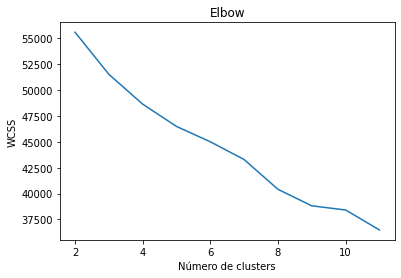

In [21]:
elbow(X_scaled)

In [22]:
# Talvez o método do cotovelo não tenha nos deixado próximo de um N ideal. 
# Vamos tentar com algumas análises com a biblioteca yellowbricks.

In [23]:
from yellowbrick.cluster import KElbowVisualizer

In [24]:
def elbow_yellow(values):
  kmeans = KMeans() 
  visualizer = KElbowVisualizer(kmeans, k=(2,12))
  visualizer.fit(values)
  visualizer.show()

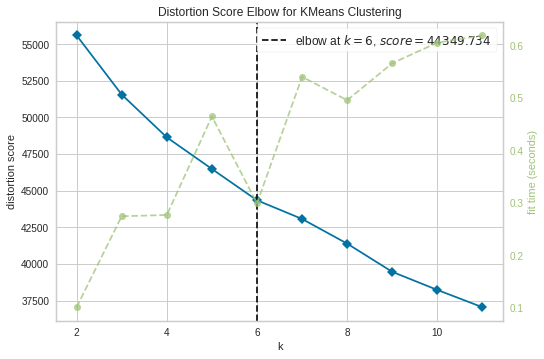

In [25]:
elbow_yellow(X_scaled)

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

In [27]:
def sillhouette(values, k):
  kmeans = KMeans(k) 
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
  visualizer.fit(X_scaled)
  visualizer.show()

In [ ]:
for i in range(2,12):
  sillhouette(X_scaled, i)

##### Reduzindo a dimensionalidade (poderia ter sido feito antes dessas análises)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
pca.fit(X_scaled)
features = range(pca.n_components_)

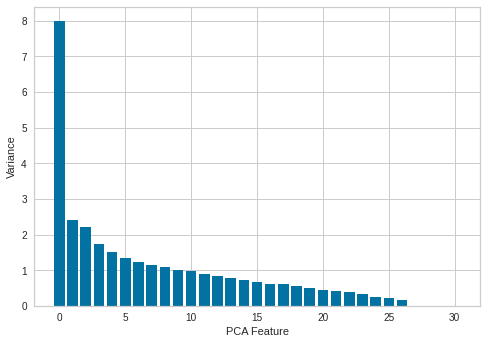

In [31]:
# Quanto maior a Variance, mais o meu número de componentes consegue explicar a variação dos dados.
# Quando a diferença ficar muito grande, é porque está overfitando, e ali fica um bom lugar para se olhar para o N de clusters.
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

In [32]:
# Reduzir a dimensionalidade dos dados para 4. Pensado a partir do gráfico de PCA x Variance.

In [33]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [34]:
X_pca

array([[ 4.09178902, -2.32161786,  0.83263696,  1.37455138],
       [-2.60113776, -0.19137553, -0.64349369,  0.11825369],
       [ 1.70605509, -1.41440939,  0.21684229,  0.42199176],
       ...,
       [ 2.40581608,  0.89114185, -1.64825531,  0.61359442],
       [ 1.35696876, -0.55777637,  1.25211469, -1.95770002],
       [-2.36256499,  1.00357094,  1.84107881, -1.32608026]])

In [35]:
df_X_pca = pd.DataFrame(X_pca, columns=(['PC0','PC1','PC2','PC3']))
df_X_pca

,PC0,PC1,PC2,PC3
0,4.091789,-2.321618,0.832637,1.374551
1,-2.601138,-0.191376,-0.643494,0.118254
2,1.706055,-1.414409,0.216842,0.421992
3,-2.600414,-0.330661,-1.009770,0.937154
4,-0.499370,-0.041155,0.998188,-1.334776
...,...,...,...,...
2235,2.255402,-1.123919,1.940116,1.816226
2236,-1.144951,3.755845,3.125536,-1.224163
2237,2.405816,0.891142,-1.648255,0.613594
2238,1.356969,-0.557776,1.252115,-1.957700


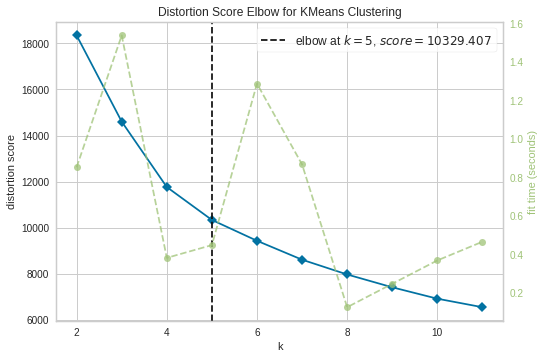

In [36]:
elbow_yellow(df_X_pca)

In [ ]:
for i in range(2,12):
  sillhouette(df_X_pca, i)

In [39]:
# Vamos usar 5 clusters em uma primeira análise, seguindo a recomendação do método do cotovelo.

In [40]:
kmeans = KMeans(n_clusters=5)
yKMeans = kmeans.fit_predict(df_X_pca)

In [41]:
yKMeans

array([0, 3, 0, ..., 0, 1, 4], dtype=int32)

In [42]:
customers['Cluster'] = yKMeans

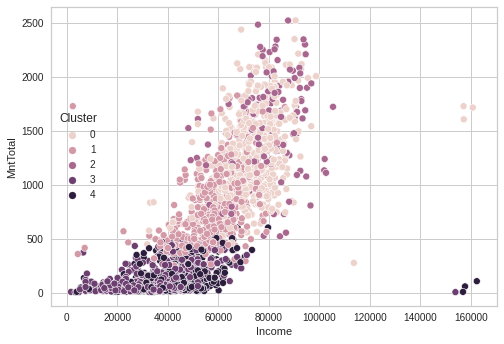

In [44]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers, hue='Cluster')
plt.show()

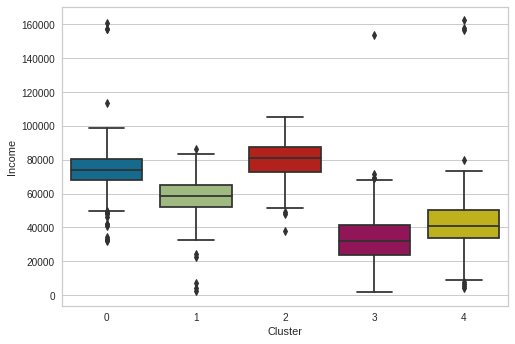

In [46]:
sns.boxplot(x='Cluster',y='Income',data=customers)
plt.show()

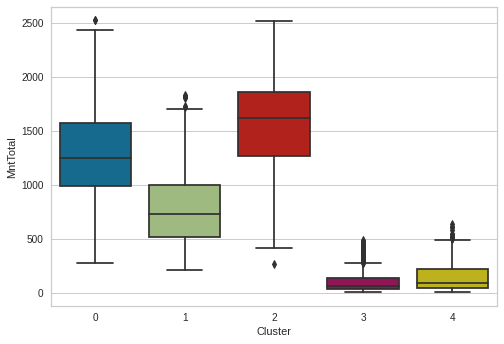

In [47]:
sns.boxplot(x='Cluster',y='MntTotal',data=customers)
plt.show()

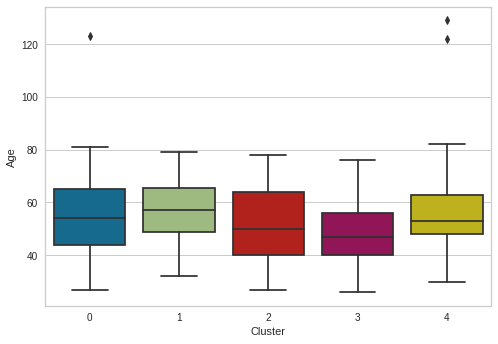

In [53]:
sns.boxplot(x='Cluster',y='Age',data=customers)
plt.show()

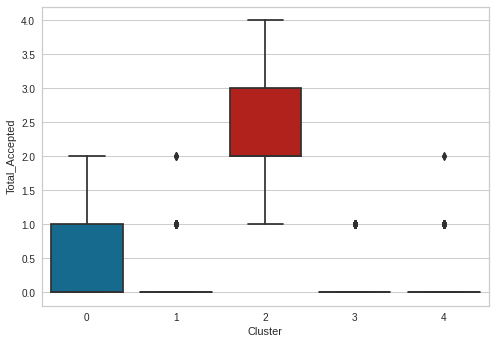

In [56]:
sns.boxplot(x='Cluster',y='Total_Accepted',data=customers)
plt.show()

In [79]:
customers[customers['Cluster']==0].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Cluster
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.00000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,73931.748873,49.786585,537.256098,69.719512,441.729675,100.654472,69.833333,78.278455,1.367886,5.174797,5.73374,8.514228,2.806911,0.038618,0.030488,0.117886,...,0.0,0.002033,0.184959,0.272358,54.357724,355.349593,1.563008,0.227642,1.790650,1297.471545,0.097561,0.002033,0.560976,0.144309,0.195122,0.0
std,12185.863820,29.420977,280.972829,50.444285,246.396089,65.750644,52.544275,60.819268,1.268780,2.608527,2.87631,2.986357,1.769081,0.192879,0.172100,0.322802,...,0.0,0.045083,0.388660,0.450173,13.412995,206.753707,0.496519,0.429332,0.637327,399.959536,0.297022,0.045083,0.496773,0.351760,0.396698,0.0
min,31907.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,27.000000,1.000000,1.000000,0.000000,1.000000,277.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,68015.500000,24.750000,336.000000,26.750000,254.750000,45.000000,29.000000,32.000000,1.000000,3.000000,4.00000,6.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,44.000000,181.750000,1.000000,0.000000,1.000000,988.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,74202.000000,52.000000,493.000000,60.000000,406.000000,89.500000,56.000000,56.000000,1.000000,5.000000,5.00000,9.000000,2.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,54.000000,363.500000,2.000000,0.000000,2.000000,1247.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,80350.750000,74.000000,735.250000,104.250000,573.000000,150.000000,105.000000,111.250000,1.000000,6.000000,7.00000,11.000000,4.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.000000,65.000000,528.250000,2.000000,0.000000,2.000000,1574.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,160803.000000,99.000000,1449.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.00000,13.000000,9.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,2.000000,123.000000,698.000000,2.000000,2.000000,3.000000,2525.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Insights da Clusterização. 
##### Com 5 clusters, a divisão ficou interessante principalmente se olharmos pela renda anual do cliente (income), que talvez seja uma de nossas variáveis mais importantes. Com 5 clusters, as categorias de clientes ficaram bem definidas. Os que mais ganham são os que mais consomem no aplicativo (cluster 2). E também são eles que mais aceitam as campanhas. 
##### O cluster 0 consome um pouco menos que os cluster 2, e também aceita a menos campanhas, porém pode ser um ótimo alvo para nossa nova campanha, visto que eles tem uma renda média anual alta.
##### O cluster 1 gasta mais que os clusters 3 e 4, porém não aceitou a tantas campanhas, também pode ser um bom alvo, visto que a renda média anual deles é consideravelmente maior que dos clusters 3 e 4.
##### Os clusters 3 e 4 nos trazem clientes que gastaram pouco em produtos no aplicativo, aceitaram a campanha pouquíssimas vezes e tem uma renda média anual bem abaixo dos outros clusters. Talvez não seja esse perfil de cliente que estamos buscando para nossa nova campanha.

In [ ]:
# dfi = dfi[['Year_Birth','Dt_Customer','Education','Marital_Status','Income','Kidhome',
#'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
#'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
#'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']